In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
marathon = pd.read_csv("C:\PythonScripts\course-files\marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
marathon.head()

,Age,M/F,Country,40K
0,24,M,KEN,2:02:53
1,30,M,USA,2:03:14
2,25,M,JPN,2:03:38
3,32,M,USA,2:04:35
4,31,M,KEN,2:05:00


In [3]:
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.to_timedelta(x,errors='coerce').total_seconds())
groupMF = marathon[marathon["Country"].isin(["USA","CAN"])].groupby(by=["Country","M/F"])
groupMF = groupMF.agg({"TimeSeconds": ["mean"]})
groupMF = groupMF.unstack()
groupMF.columns = groupMF.columns.droplevel().droplevel()
groupMF

M/F,F,M
Country,,
CAN,13618.346012,12527.160190
USA,14188.759649,13004.157656


<AxesSubplot:xlabel='Country'>

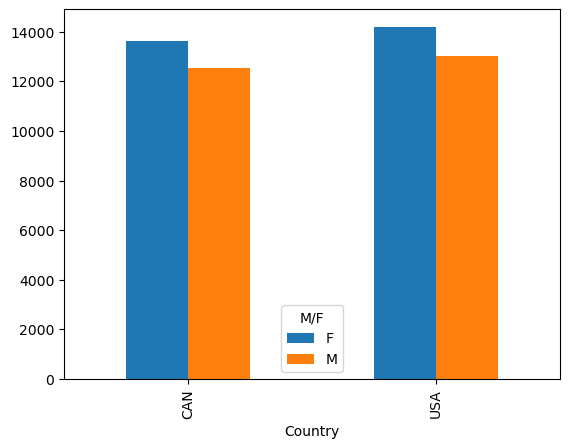

In [4]:
groupMF.plot(kind='bar')

<AxesSubplot:xlabel='Country'>

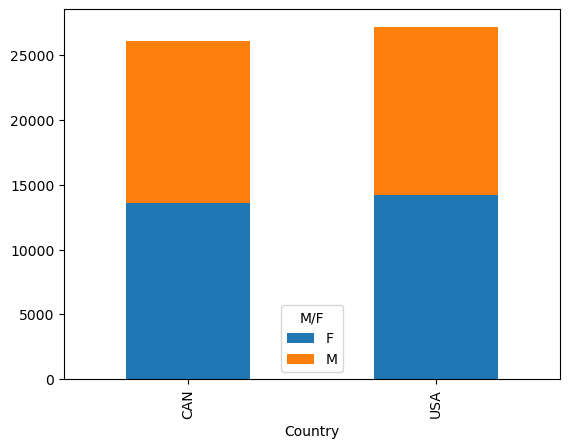

In [5]:
groupMF.plot(kind='bar',stacked=True)

<AxesSubplot:ylabel='Country'>

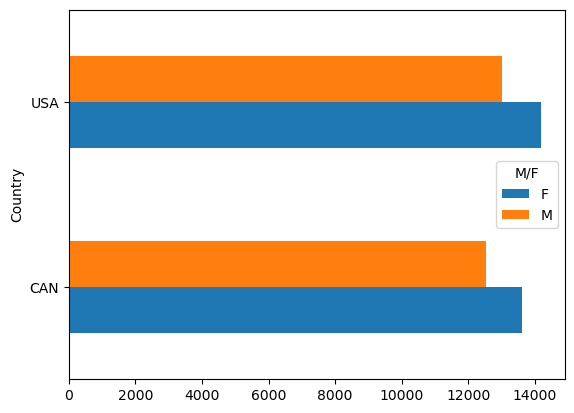

In [6]:
groupMF.plot(kind='barh')

In [7]:
age_data = marathon[ marathon["Country"].isin(["USA"]) ]
age_data.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


<AxesSubplot:ylabel='Frequency'>

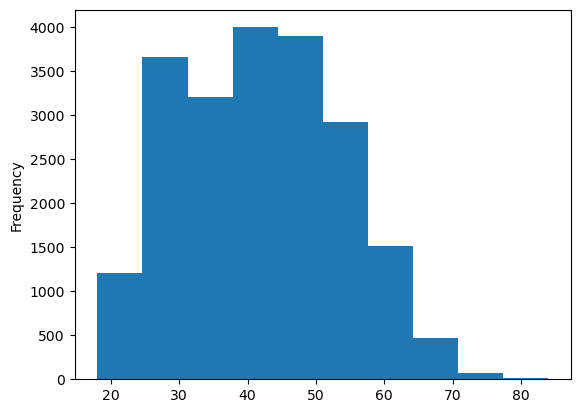

In [8]:
age_data['Age'].plot(kind='hist')

In [9]:
age_data['Age'].value_counts()

45    840
46    749
40    711
35    642
41    621
     ... 
80      1
83      1
81      1
79      1
84      1
Name: Age, Length: 66, dtype: int64

<AxesSubplot:ylabel='Frequency'>

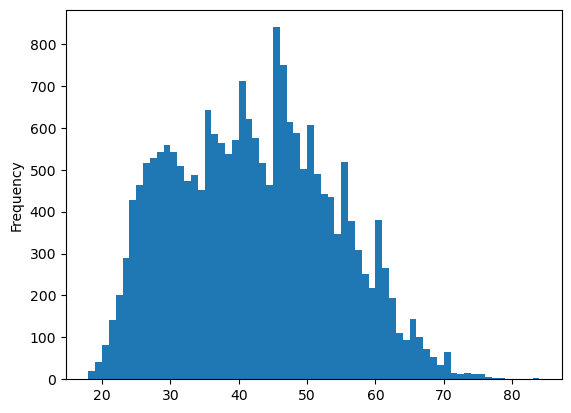

In [10]:
age_data['Age'].plot(kind='hist',bins=66)

In [11]:
data_USA = marathon[ marathon["Country"].isin(["USA"]) ]
data_USA.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


<AxesSubplot:>

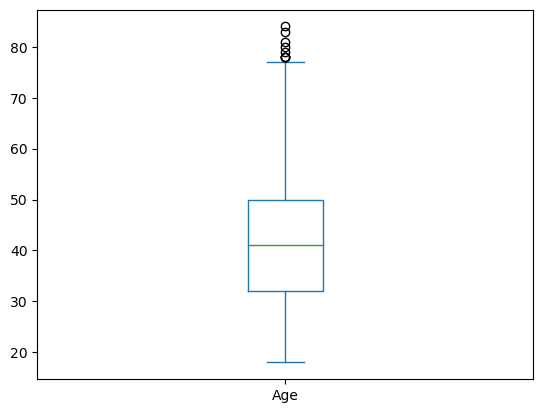

In [12]:
data_USA['Age'].plot(kind='box')

In [13]:
USA = marathon[ marathon["Country"].isin(["USA"]) ]["Age"]
CAN = marathon[ marathon["Country"].isin(["CAN"]) ]["Age"]
df = pd.DataFrame({'USA':USA, 'CAN':CAN})
df.head()

,USA,CAN
1,30.0,NaN
3,32.0,NaN
5,40.0,NaN
6,33.0,NaN
8,27.0,NaN


<AxesSubplot:>

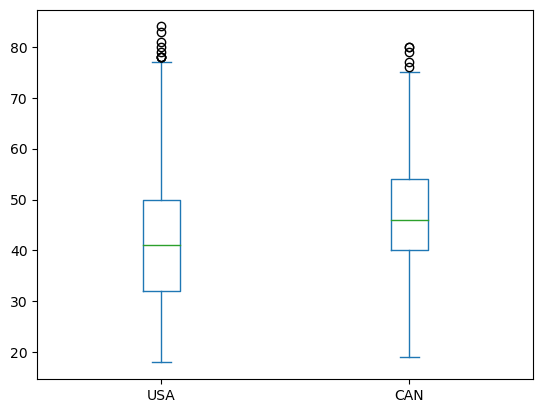

In [14]:
df.plot(kind='box')